Task 1
Use tweepy and the twitter search terms “Clinton” and “Trump” and the respective states (or the geolocation search option) to provide the required output.

In [1]:
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def getTwitterData(searchTerm,code,filename):
    
    CONSUMER_KEY = 'mcHg73LXHcUtYfg6MYlTGvovU'
    CONSUMER_SECRET = 'vieVDcxAFhFTltTnLUzoZRuwG6QryXFnFtItTqKerHYaWASumK'
    OAUTH_TOKEN = '785603734495596544-OqeUxehteJnMqVw9MfYSDMPXcDatLmV'
    OAUTH_TOKEN_SECRET = 'fGQ3162mmYMQHc9qo1rpZoLyyKfe4r77H0bnPegiFC1aY'
    
    #gain access to twitter API
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET) 
    auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
    
    api = tweepy.API(auth)
    
    #use tweepy and search to get 1000 relational tweets from twitter.
    tweets=[]
    for tweet in tweepy.Cursor(api.search,q=searchTerm,geocode=code).items(1000):   
        tweets.append(tweet.text)
    
    #translate search results into lower cases.
    lowered_texts = []
    for texts in tweets:
        try: 
            mytext = str(texts.lower())
            lowered_texts.append(mytext)
        except:
            pass
    
    #eliminate punctuation in results.
    punctuation = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"
    s_sans_punct = ""
    for letter in str(lowered_texts):
        if (letter not in punctuation) and (letter in "abcdefghijklmnopqrstuvwxyz "):
            s_sans_punct += letter
    
    #gain polarity points.
    sentiment=[]
    t=TextBlob(s_sans_punct)
    sentiment.append(t.sentiment.polarity)
    
    sentiment2=[]
    score=(sentiment[0]+1)*50
    sentiment2.append(score)
    
    text=[]
    text.append(s_sans_punct)
    
    df=pd.DataFrame()
    df['sentiment']=sentiment2
    df['text']=text
    df.to_csv(filename)

    return sentiment2


In [4]:
getTwitterData('Clinton','44.31,-85.60,500mi','tweepy-Clinton-Michigan.csv')

[51.724863342574714]

In [7]:
getTwitterData('Clinton','38.80,-116.42,500mi','tweepy-Clinton-Nevada.csv')

[53.31280270884231]

In [8]:
getTwitterData('Clinton','43.78,-88.79,500mi','tweepy-Clinton-Wisconsin.csv')

[49.61423595989374]

In [10]:
getTwitterData('Clinton','40.42,-80.91,500mi','tweepy-Clinton-Ohio.csv')

[54.25872023796507]

In [11]:
getTwitterData('Trump','44.31,-85.60,500mi','tweepy-Trump-Michigan.csv')

[48.54747747718815]

In [17]:
getTwitterData('Trump','38.80,-116.42,500mi','tweepy-Trump-Nevada.csv')

[53.32468123972387]

In [18]:
getTwitterData('Trump','43.78,-88.79,500mi','tweepy-Trump-Wisconsin.csv')

[52.176301594224824]

In [23]:
getTwitterData('Trump','40.42,-80.91,500mi','tweepy-Trump-Ohio.csv')

[47.25224256252077]

In [24]:
#draw the plot.
def plotdata_tweepy():
    df_1=pd.read_csv('tweepy-Clinton-Michigan.csv')
    df_2=pd.read_csv('tweepy-Clinton-Nevada.csv')
    df_3=pd.read_csv('tweepy-Clinton-Wisconsin.csv')
    df_4=pd.read_csv('tweepy-Clinton-Ohio.csv')

    df_a=pd.read_csv('tweepy-Trump-Michigan.csv')
    df_b=pd.read_csv('tweepy-Trump-Nevada.csv')
    df_c=pd.read_csv('tweepy-Trump-Wisconsin.csv')
    df_d=pd.read_csv('tweepy-Trump-Ohio.csv')

    clinton=pd.DataFrame({'Michigan':df_1.loc[[0],'sentiment'],
                          'Nevada':df_2.loc[[0],'sentiment'],
                          'Wisconsin':df_3.loc[[0],'sentiment'],
                          'Ohio':df_4.loc[[0],'sentiment']})
    trump=pd.DataFrame({'Michigan':df_a.loc[[0],'sentiment'],
                        'Nevada':df_b.loc[[0],'sentiment'],
                        'Wisconsin':df_c.loc[[0],'sentiment'],
                        'Ohio':df_d.loc[[0],'sentiment']})
    All=clinton.append(trump)

    All=All.T
    All.columns = ['Clinton', 'Trump']
    
    plt.style.use('ggplot')
    colors=['blue','red']
    All.plot(kind='barh',color=colors)
    plt.xlabel('sentiment')
    
    plt.title('Clinton and Trump-tweepy')
    plt.show()
    

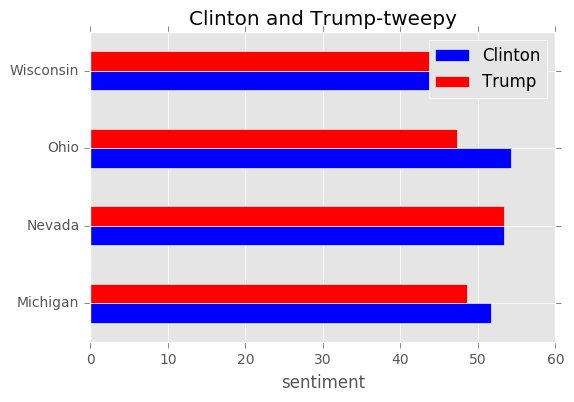

In [25]:
plotdata_tweepy()